In [45]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [46]:
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings('ignore')
# 한글폰트
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
    print('Mac version')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
    print('Windows version')
elif platform.system() == 'Linux':
    path = "/usr/share/fonts/NanumFont/NanumGothicBold.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
    print('Linux version')
else:
    print('Unknown system... sorry~~~~')

Linux version


In [47]:
train = pd.read_csv('data/train.csv', parse_dates=["date_time"])

- date_time : 일별 날짜
- wind_direction: 풍향 (degree)
- sky_condition : 하늘 상태 (하단 설명 참조)
- precipitation_form : 강수 형태 (하단 설명 참조)
- wind_speed : 풍속 (m/s)
- humidity : 습도 (%)
- low_temp : 최저 기온 ( `C)
- high_temp : 최고 기온 ( `C)
- Precipitation_Probability : 강수 확률 (%)
- number_of_rentals : 따릉이 대여량

- 기상 데이터는 하루에 총 8번 3시간 간격으로 발표되는 기상단기예보(SHRT) 데이터를 1일 평균으로 변환한 데이터입니다.
- 2019년 6월 4일 까지 sky_condition (하늘 상태) 코드  : 맑음(1), 구름조금(2), 구름많음(3), 흐림(4)
- 2020년  sky_condition (하늘 상태) 코드  : 맑음(1), 구름많음(3), 흐림(4)
- precipitation_form (강수 형태) 코드 : 없음(0), 비(1), 진눈깨비(2), 눈(3), 소나기(4)
- 원본 데이터에는 없음(0), 비(1),소나기(4)가 포함되어있었으며 진눈깨비(2)와 눈(3) 성분은 존재하지 않습니다.

In [71]:
train.head()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals,year,month,day,weekday
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994,2018,4,1,6
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139,2018,4,2,0
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817,2018,4,3,1
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034,2018,4,4,2
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833,2018,4,5,3


In [49]:
train.shape

(273, 10)

In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date_time                  273 non-null    datetime64[ns]
 1   wind_direction             273 non-null    float64       
 2   sky_condition              273 non-null    float64       
 3   precipitation_form         273 non-null    float64       
 4   wind_speed                 273 non-null    float64       
 5   humidity                   273 non-null    float64       
 6   low_temp                   273 non-null    float64       
 7   high_temp                  273 non-null    float64       
 8   Precipitation_Probability  273 non-null    float64       
 9   number_of_rentals          273 non-null    int64         
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 21.5 KB


In [51]:
train.isnull().sum()

date_time                    0
wind_direction               0
sky_condition                0
precipitation_form           0
wind_speed                   0
humidity                     0
low_temp                     0
high_temp                    0
Precipitation_Probability    0
number_of_rentals            0
dtype: int64

In [56]:
train["year"] = train["date_time"].dt.year
train["month"] = train["date_time"].dt.month
train["day"] = train["date_time"].dt.day
train["weekday"] = train["date_time"].dt.weekday
train.shape

(273, 14)

In [60]:
train.head(10)

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals,year,month,day,weekday
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994,2018,4,1,6
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139,2018,4,2,0
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817,2018,4,3,1
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034,2018,4,4,2
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833,2018,4,5,3
5,2018-04-06,256.412,3.466,0.358,3.734,68.885,2.500,9.895,40.068,13297,2018,4,6,4
6,2018-04-07,288.858,1.912,0.000,4.824,45.541,1.938,10.947,9.122,13088,2018,4,7,5
7,2018-04-08,200.939,2.405,0.054,3.865,53.243,4.312,14.211,15.676,7758,2018,4,8,6
8,2018-04-09,165.196,2.000,0.000,2.412,55.473,8.188,17.474,10.000,23925,2018,4,9,0
9,2018-04-10,171.541,2.919,0.088,5.607,54.054,8.375,18.474,21.824,20423,2018,4,10,1


[Text(0.5, 0, 'weekday'), Text(0.5, 1.0, '요일별 대여량')]

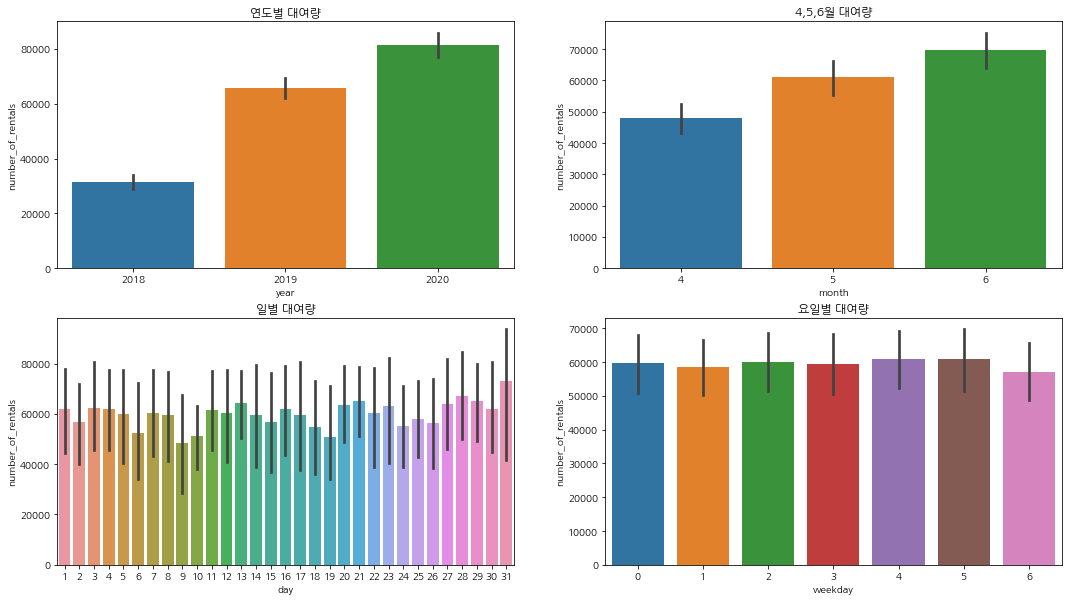

In [76]:
figure, ((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(18,10)

sns.barplot(data=train, x="year", y="number_of_rentals", ax=ax1)
sns.barplot(data=train, x="month", y="number_of_rentals", ax=ax2)
sns.barplot(data=train, x="day", y="number_of_rentals", ax=ax3)
sns.barplot(data=train, x="weekday", y="number_of_rentals", ax=ax4)

ax1.set(ylabel='number_of_rentals',title="연도별 대여량")
ax2.set(xlabel='month',title="4,5,6월 대여량")
ax3.set(xlabel='day', title="일별 대여량")
ax4.set(xlabel='weekday', title="요일별 대여량")

- 년도별 그래프를 보면 매년마다 대여량이 많아지는걸 볼 수 있다.
- 4,5,6월 그래프를 보면 날씨가 따뜻해질수록 대여량이 많아지는걸 볼 수 있다.
-
- 요일별 그래프는 대여량이 요일별 비슷한걸로 보인다.

<AxesSubplot:>

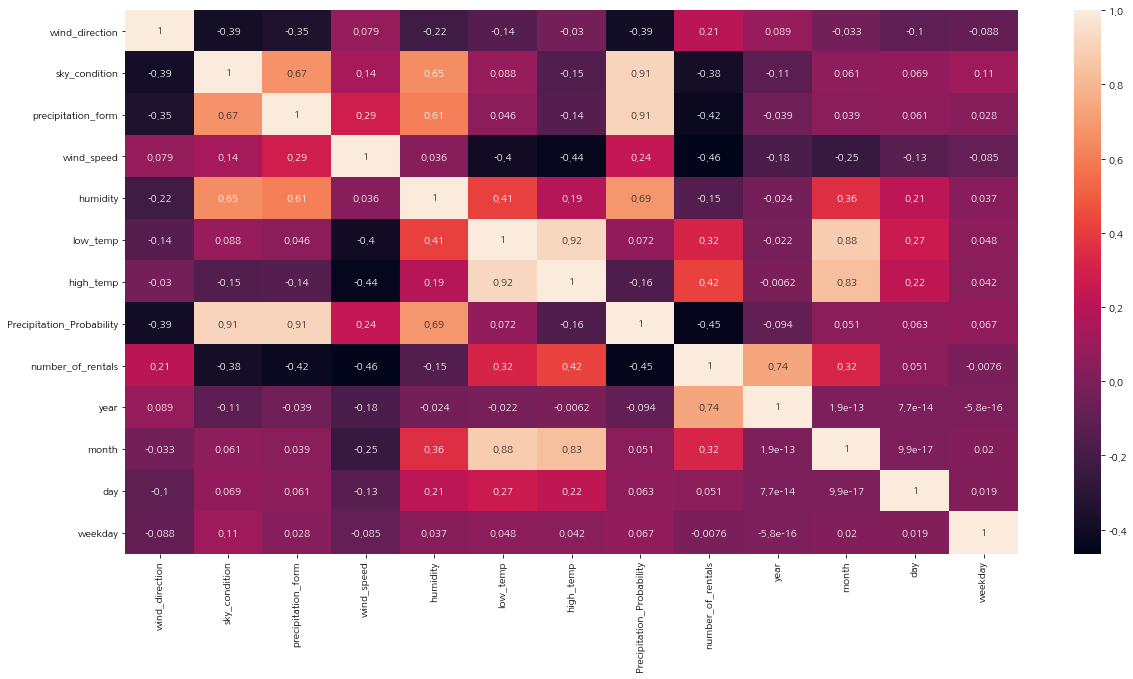

In [74]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(train.corr(), annot = True)

<AxesSubplot:xlabel='precipitation_form', ylabel='number_of_rentals'>

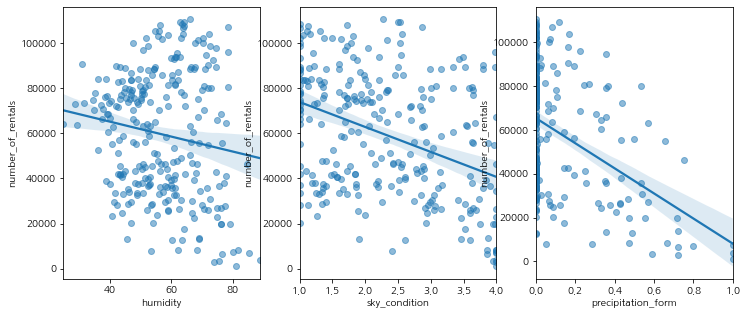

In [82]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12,5)
sns.regplot(x="humidity", y="number_of_rentals", data=train,ax=ax1, scatter_kws={'alpha':0.5}) 
sns.regplot(x="sky_condition", y="number_of_rentals", data=train,ax=ax2, scatter_kws={'alpha':0.5})
sns.regplot(x="precipitation_form", y="number_of_rentals", data=train, ax=ax3, scatter_kws={'alpha':0.5})